# Exemplo de uso do Face Recognition API

Este notebook faz upload de uma imagem de teste para o endpoint `/register` para registrar um novo rosto e  `/recognize` que mostra o nome retornado pelo serviço.


In [2]:
!pip install requests

/bin/bash: /home/koiti/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (35 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (149 kB)
Using cached urllib3-2.4.0-py3-none-any.whl (128 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [requests]


In [3]:
import requests
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
# Defina a URL base da sua API (ajuste a porta se necessário)
BASE_URL = "http://localhost:8005"

def register_person(name: str, image_path: str) -> dict:
    """
    Envia ao endpoint /register:
     - name: nome a ser cadastrado
     - image_path: caminho para o arquivo de imagem (jpg, png)
    Retorna o JSON de resposta ou levanta erro em caso de status != 200.
    """
    url = f"{BASE_URL}/register"
    with open(image_path, "rb") as img_file:
        files = {
            "file": (image_path.split("/")[-1], img_file, "image/jpeg")
        }
        data = {"name": name}
        resp = requests.post(url, files=files, data=data)
    resp.raise_for_status()
    return resp.json()

def recognize_person(image_path: str) -> dict:
    """
    Envia ao endpoint /recognize:
     - image_path: caminho para a imagem de teste
    Retorna o JSON de resposta ({"name": "..."}).
    """
    url = f"{BASE_URL}/recognize"
    with open(image_path, "rb") as img_file:
        files = {
            "file": (image_path.split("/")[-1], img_file, "image/jpeg")
        }
        resp = requests.post(url, files=files)
    resp.raise_for_status()
    return resp.json()

In [ ]:
# 1) Cadastrando pessoas
#indicar o caminho da imagem a ser cadastrada
path_to_register = "/home/koiti/Downloads/facerecognition/koititeste.jpeg"

img = Image.open(path_to_register)
plt.imshow(img)
plt.axis("off")
print("Cadastrando pessoa 'PessoaA'…")

# abaixo indicar o nome da pessoa a ser cadastrada no primeiro argumento
resp_reg = register_person("PessoaA", path_to_register)
print("Resposta do /register:", resp_reg)

Reconhecendo…
Resposta do /recognize: {'name': 'Koiti'}


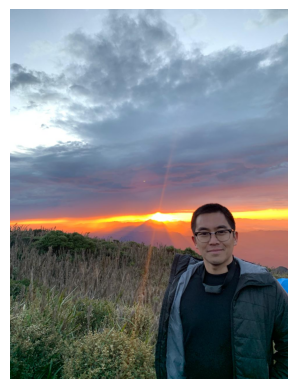

In [5]:
# 2) Mostrar a imagem que vamos testar para reconhecimento
path_to_test = "/home/koiti/Downloads/facerecognition/koititeste.jpeg"
img2 = Image.open(path_to_test)
plt.figure()
plt.imshow(img2)
plt.axis("off")
print("Reconhecendo…")
resp_rec = recognize_person(path_to_test)
print("Resposta do /recognize:", resp_rec)

este caso, a API deve retornar algo como `{"name": "PessoaA"}` se o rosto for reconhecido corretamente.  
Caso altere a foto para alguém não cadastrado, a resposta será `{"name": "Unknown"}`.  